##An Electrochemical Impedance Spectrum in 3D
This notebook contains a visualization of a simple equivalent circuit, -R-(RC)-, in 3D where the axes used corresponds to the frequency range used to obtain the data (in this case for calculation of the frequency dependent impedance of the circuit), and the real and imaginary parts of the complex impedance.  

Common visualizations of this kind of data include a complex plane plot (or a Nyquist plot) and a plot of the impedance modulus or one of the components (real or imaginary) versus the logarithm of the frequency, which corresponds to the wall projections in the 3D plot below.

In [23]:
#python dependencies
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.constants import codata

# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

In [24]:
#change the default font set (matplotlib.rc)
mpl.rc('mathtext', fontset='stixsans', default='regular')

#increase text size somewhat
mpl.rcParams.update({'axes.labelsize':12, 'font.size': 12})

In [25]:
#set up notebook for inline plots
%matplotlib inline

In [26]:
#generate a frequency range

def freq_range(fstart = 9685000, fstop = 0.0968, pts_per_decade = 12):
    """returns a frequency range in terms as a numpy array, 
       between fstart [Hz] and fstop [Hz], with a set number
       of points per decade (defaults to 12)"""
    decades = np.log10(fstart)-np.log10(fstop)
    pts_total = np.around(decades*pts_per_decade)
    frange = np.logspace(np.log10(fstop),np.log10(fstart), pts_total, endpoint=True)
    return frange

def freq_to_ang_freq(frange):
    """returns the angular frequency in rad/s, input is frequency in Hz,
       works on arrays as well as single numbers"""
    w = 2*np.pi*frange #angular frequency
    return w

w = freq_to_ang_freq(freq_range())

In [27]:
#define parameters for a -R-(RC)- circuit

R0 = 5 #Ohm
R1 = 10 #Ohm
C1 = 10e-6 #F

In [28]:
#define the impedance of the elements in the circuit and add them up
Z_R0 = R0
Z_R1 = R1
Z_C1 = -1j/(w*C1) #capacitive reactance

#R1 and C1 connected in parallel
Z_RC = 1/(1/Z_R1 + 1/Z_C1) #parallel connection

#Z_R0 and Z_RC connected in series
Z = Z_R0 + Z_RC

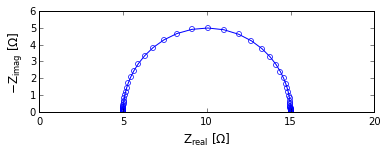

In [29]:
#2D plot (Nyquist / Complex Plane)

fig = plt.figure()
ax1 = fig.add_subplot(111, aspect='equal')
ax1.plot(Z.real, -1*Z.imag, marker='o',ms=5, mec='b', mew=0.7, mfc='none')
ax1.set_xlim(0,20)
ax1.set_ylim(0,6)
ax1.set_xlabel('Z$_{real}$ [$\Omega$]')
ax1.set_ylabel('-Z$_{imag}$ [$\Omega$]')

In [30]:
max(np.log10(freq_range())), min(np.log10(freq_range()))

(6.9860996250551297, -1.0141246426916064)

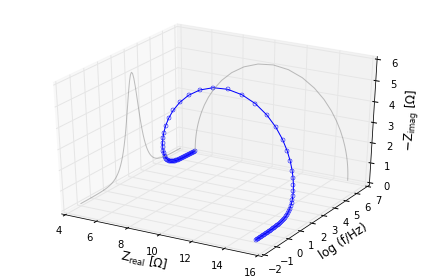

In [31]:
#3D plot (Z.real, Z.imag, f)

fig = plt.figure()
ax = plt.axes(projection='3d')

x = Z.real
z = -1*Z.imag
y = np.log10(freq_range())

#add 3D curve
ax.plot(x, y, z, marker='o', color='b', mfc='none', mec='b', ms=4)
ax.set_xlabel('Z$_{real}$ [$\Omega$]')
ax.set_zlabel('-Z$_{imag}$ [$\Omega$]')
ax.set_ylabel('log (f/Hz)')

#set axes equal between x and z
#not sure how to do this in 3D, works with ax.axis('equal') or ax.set_aspect('equal') in 2D... 

#set axis limits
ax.set_zlim(0, 6)
ax.set_ylim(-2,7)
xlims = ax.get_xlim()

#add wall projections by plotting z vs y and x vs z
ax.plot(x,7*np.ones(len(x)),z, color = 'grey', ls='-', alpha=0.5, marker='', ms=4)
ax.plot(xlims[0]*np.ones(len(x)),y,z, color = 'grey', ls='-', alpha=0.5, marker='', ms=4)

#ax.view_init(30, 90)
fig.tight_layout()